In [3]:
from pathlib import Path

import scanpy as sc
import scvelo as scv
DATA_DIR = Path("/disk5/luosg/scRNAseq/data")
DATA_DIR.mkdir(parents=True, exist_ok=True)

FILE_PATH = DATA_DIR / "pancreas.h5ad"

In [4]:
adata = scv.datasets.pancreas(file_path=FILE_PATH)
adata

  0%|          | 0.00/50.0M [00:00<?, ?B/s]

AnnData object with n_obs × n_vars = 3696 × 27998
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score'
    var: 'highly_variable_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'
    obsp: 'distances', 'connectivities'

In [5]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)

Filtered out 20801 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.


/home/luosg/miniconda3/envs/scRNAseq_rpy2_1/lib/python3.11/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


In [6]:
sc.tl.pca(adata)
sc.pp.neighbors(adata)
scv.pp.moments(adata, n_pcs=None, n_neighbors=None)

computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


/home/luosg/miniconda3/envs/scRNAseq_rpy2_1/lib/python3.11/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/home/luosg/miniconda3/envs/scRNAseq_rpy2_1/lib/python3.11/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/home/luosg/miniconda3/envs/scRNAseq_rpy2_1/lib/python3.11/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/home/luosg/miniconda3/envs/scR

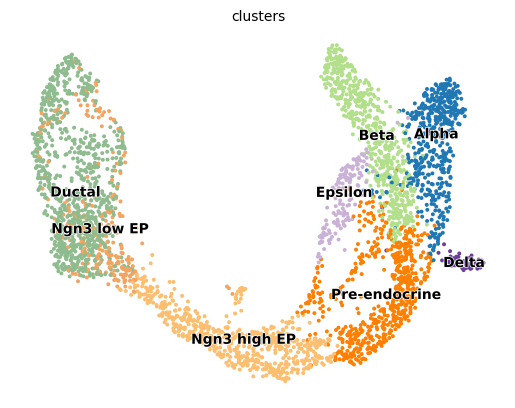

In [7]:
scv.pl.scatter(adata, basis="umap", color="clusters")

In [8]:
scv.tl.velocity(adata, mode="deterministic")

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


computing velocity graph (using 8/56 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

Exception in thread Thread-7 (update):
Traceback (most recent call last):
  File "/home/luosg/miniconda3/envs/scRNAseq_rpy2_1/lib/python3.11/site-packages/tqdm/notebook.py", line 262, in update
    return super().update(n=n)
           ^^^^^^^^^^^^^^^^^^^
  File "/home/luosg/miniconda3/envs/scRNAseq_rpy2_1/lib/python3.11/site-packages/tqdm/std.py", line 1242, in update
    self.refresh(lock_args=self.lock_args)
  File "/home/luosg/miniconda3/envs/scRNAseq_rpy2_1/lib/python3.11/site-packages/tqdm/std.py", line 1347, in refresh
    self.display()
  File "/home/luosg/miniconda3/envs/scRNAseq_rpy2_1/lib/python3.11/site-packages/tqdm/notebook.py", line 157, in display
    pbar.value = self.n
    ^^^^^^^^^^
  File "/home/luosg/miniconda3/envs/scRNAseq_rpy2_1/lib/python3.11/site-packages/traitlets/traitlets.py", line 716, in __set__
    self.set(obj, value)
  File "/home/luosg/miniconda3/envs/scRNAseq_rpy2_1/lib/python3.11/site-packages/traitlets/traitlets.py", line 706, in set
    obj._notif

    finished (0:00:03) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


/home/luosg/miniconda3/envs/scRNAseq_rpy2_1/lib/python3.11/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/home/luosg/miniconda3/envs/scRNAseq_rpy2_1/lib/python3.11/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/home/luosg/miniconda3/envs/scRNAseq_rpy2_1/lib/python3.11/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/home/luosg/miniconda3/envs/scR

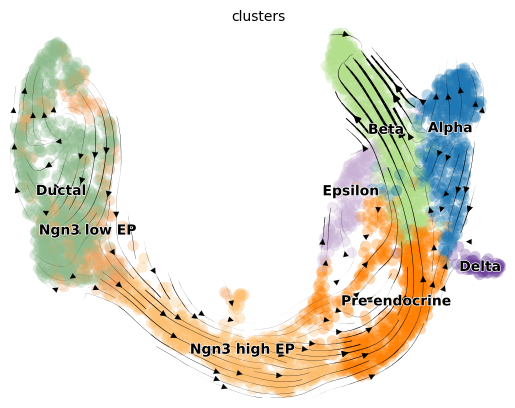

In [9]:
scv.tl.velocity_graph(adata, n_jobs=8)
scv.pl.velocity_embedding_stream(adata, basis="umap", color="clusters")

In [ ]:
scv.tl.recover_dynamics(adata, n_jobs=8)

recovering dynamics (using 8/56 cores)


In [ ]:
top_genes = adata.var["fit_likelihood"].sort_values(ascending=False).index
scv.pl.scatter(adata, basis=top_genes[:5], color="clusters", frameon=False)